##  使用Tensorflow和Pytorch框架实现基于神经网络的逻辑回归

### 01.获取Minist数据集

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


### 02.查看minist数据集内容
```
minist数据集是0-9的图像数字
```

 数据类型 is <class 'numpy.ndarray'>
 标签类型 <class 'numpy.ndarray'>
 训练集的shape (55000, 784)
 训练集的标签的shape (55000, 10)
 测试集的shape' is (10000, 784)
 测试集的标签的shape (10000, 10)
17068th 训练数据 标签是 6


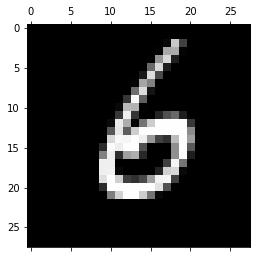

24022th 训练数据 标签是 8


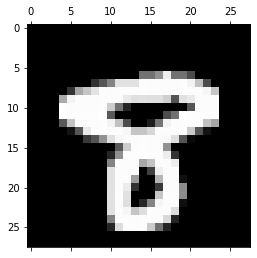

52384th 训练数据 标签是 0


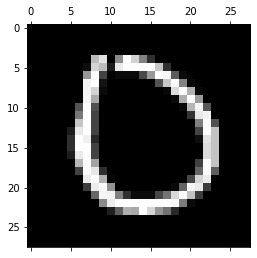

30847th 训练数据 标签是 8


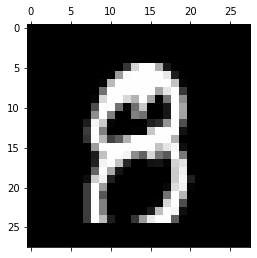

15086th 训练数据 标签是 9


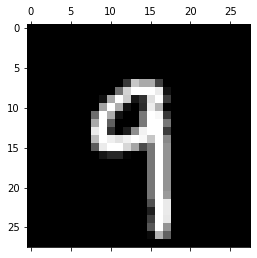

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels

print (" 数据类型 is %s"    % (type(trainimg)))
print (" 标签类型 %s"  % (type(trainlabel)))
print (" 训练集的shape %s"   % (trainimg.shape,))
print (" 训练集的标签的shape %s" % (trainlabel.shape,))
print (" 测试集的shape' is %s"    % (testimg.shape,))
print (" 测试集的标签的shape %s"  % (testlabel.shape,))

nsample = 5
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    print ("" + str(i) + "th 训练数据 " 
           + "标签是 " + str(curr_label))
    plt.show()

##  基于Tensorflow的逻辑回归实现

In [7]:
# 根据minist数据集
numClasses = 10
inputSize = 784  
trainingIterations = 50000
batchSize = 64

In [8]:
# 规定输入特征数据和标签的占位符
X = tf.placeholder(tf.float32,shape=[None,inputSize])
y = tf.placeholder(tf.float32,shape=[None,numClasses])

In [9]:
# 权重参数初始化
W1 = tf.Variable(tf.random_normal([inputSize,numClasses],stddev=0.1))
B1 = tf.Variable(tf.constant(0.1),[numClasses])

In [10]:
# 构造模型
y_pred = tf.nn.softmax(tf.matmul(X,W1)+B1)

loss = tf.reduce_mean(tf.square(y-y_pred))

opt = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))  

In [11]:
# 初始化图 并开始计算
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


for i in range(trainingIterations):
    batch = mnist.train.next_batch(batchSize)
    batchInput = batch[0]
    batchLabels = batch[1]
    _, trainingLoss = sess.run([opt, loss], feed_dict={X: batchInput, y: batchLabels})
    if i%1000 == 0:
        train_accuracy = accuracy.eval(session=sess, feed_dict={X: batchInput, y: batchLabels})
        print ("step %d, training accuracy %g"%(i, train_accuracy))

step 0, training accuracy 0.140625
step 1000, training accuracy 0.515625
step 2000, training accuracy 0.75
step 3000, training accuracy 0.734375
step 4000, training accuracy 0.71875
step 5000, training accuracy 0.84375
step 6000, training accuracy 0.875
step 7000, training accuracy 0.84375
step 8000, training accuracy 0.859375
step 9000, training accuracy 0.875
step 10000, training accuracy 0.828125
step 11000, training accuracy 0.90625
step 12000, training accuracy 0.84375
step 13000, training accuracy 0.8125
step 14000, training accuracy 0.890625
step 15000, training accuracy 0.875
step 16000, training accuracy 0.890625
step 17000, training accuracy 0.875
step 18000, training accuracy 0.90625
step 19000, training accuracy 0.890625
step 20000, training accuracy 0.859375
step 21000, training accuracy 0.859375
step 22000, training accuracy 0.953125
step 23000, training accuracy 0.875
step 24000, training accuracy 0.859375
step 25000, training accuracy 0.828125
step 26000, training accur

In [12]:
batch = mnist.test.next_batch(batchSize)
testAccuracy = sess.run(accuracy, feed_dict={X: batch[0], y: batch[1]})
print ("test accuracy %g"%(testAccuracy))

test accuracy 0.90625


## 基于Pytorch的逻辑回归实现

In [31]:
from torch  import nn
import torch.nn.functional as F

class MyLogicRegression(nn.Module):
    def __init__(self,in_channel,out_channel):
        super(MyLogicRegression,self).__init__()
        self.out = nn.Linear(in_channel,out_channel)
    
    def forward(self,x):
        x = self.out(x)
        return x

In [32]:
from torch import optim

def GetModelAndOpt():
    in_channel = 784
    out_channel = 10
    model = MyLogicRegression(in_channel,out_channel)
    opt  = optim.SGD(model.parameters(),lr=0.001)
    loss_func = F.cross_entropy
    
    return model,opt,loss_func

def loss_batch(model,x_data,y_data,loss_func,opt=None):
    if model:
        loss = loss_func(model(x_data),y_data)
    else:
        print('model is not exit')
        return
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    return loss.item(),len(x_data)

#### 有针对pytorch框架的minist数据集

In [33]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")


import torch 
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

def DataGet(x_train,y_train,x_valid,y_valid,batch):
    
    x_train,y_train,x_valid,y_valid = map(torch.tensor,(x_train,y_train,x_valid,y_valid))
    train_dataset    = TensorDataset(x_train,y_train)
    train_dataloader = DataLoader(dataset=train_dataset,
                                  batch_size=batch,
                                  shuffle=True)
    valid_dataset    = TensorDataset(x_valid,y_valid)
    valid_dataloader = DataLoader(dataset=valid_dataset,
                                  batch_size=batch,
                                  shuffle=True)
    return train_dataloader,valid_dataloader

In [36]:
val_loss_list = []
def model_fit(steps,model,opt,loss_func,train_dataloader,valid_dataloader):
    for step in range(steps):
        model.train()
        for x,y in train_dataloader:
            loss_batch(model,x,y,loss_func,opt)
        
        model.eval()
        #更改参数属性，使参数不反向传播、更新 如果此时还进行反向传播会出现element 0 have no grad的错误
        with torch.no_grad():
            losses,nums = zip(*[loss_batch(model,x,y,loss_func) for x,y in valid_dataloader])
        val_loss = np.sum(np.multiply(losses,nums)/np.sum(nums))
        print('当前step='+str(step),' 验证集损失值：'+str(val_loss))
        val_loss_list.append(val_loss)
        
    torch.save(model.state_dict(),'model_regression.pkl')

In [38]:
batch = 64
train_dataloader,valid_dataloader = DataGet(x_train,y_train,x_valid,y_valid,batch)
model,opt,loss_func = GetModelAndOpt()
steps = 25
model_fit(steps,model,opt,loss_func,train_dataloader,valid_dataloader)

当前step=0  验证集损失值：1.6802726808547974
当前step=1  验证集损失值：1.315446221923828
当前step=2  验证集损失值：1.0981821907043456
当前step=3  验证集损失值：0.9584792671203612
当前step=4  验证集损失值：0.8616607891082764
当前step=5  验证集损失值：0.7910881132125854
当前step=6  验证集损失值：0.73715759973526
当前step=7  验证集损失值：0.6946582849502564
当前step=8  验证集损失值：0.6601695730686188
当前step=9  验证集损失值：0.6315794465065001
当前step=10  验证集损失值：0.6074514603614807
当前step=11  验证集损失值：0.586837046146393
当前step=12  验证集损失值：0.5689450234413147
当前step=13  验证集损失值：0.553302708864212
当前step=14  验证集损失值：0.5394783428192138
当前step=15  验证集损失值：0.5271549904108048
当前step=16  验证集损失值：0.51615916762352
当前step=17  验证集损失值：0.5061036298751831
当前step=18  验证集损失值：0.49703844089508054
当前step=19  验证集损失值：0.4887600053787231
当前step=20  验证集损失值：0.48119559183120725
当前step=21  验证集损失值：0.4741793706893921
当前step=22  验证集损失值：0.46763407163619997
当前step=23  验证集损失值：0.4616592659950256
当前step=24  验证集损失值：0.4560848792076111


#### pytorch-model load

In [42]:
def Softmax(list):
    sum_exp = np.sum([np.exp(i) for i in  list])
    result = [np.exp(i)/sum_exp for i  in list]
    return result

import seaborn as sns
import matplotlib.pyplot as  plt

def model_load():
    #创建一个新的model
    model,opt,loss_func = GetModelAndOpt()
    print(model)
    plt.imshow(x_valid[0].reshape((28,28)),cmap='gray')
    
    #查看器预测结果
    predict = model(torch.Tensor(x_valid[0]))
    print(predict)
    #输出类型为 tensor 且附带可求导属性，因此需要使用predict.detach().numpy()将predict转换成numpy形式
    predict_result = Softmax(np.array(predict.detach().numpy()))
    fig,axes = plt.subplots()
    axes.bar(x=[i for i in range(10)],height=predict_result,width = 0.5,tick_label=[i for i in range(10)])
    axes.set_title('UnLoad Model')
    #load已经训练完成的模型
    model.load_state_dict(torch.load('model_regression.pkl'))
    
    predict = model(torch.Tensor(x_valid[0]))
    print(predict)
    predict_result = Softmax(np.array(predict.detach().numpy()))
    fig,axes = plt.subplots()
    axes.bar(x=[i for i in range(10)],height=predict_result,width = 0.5,tick_label=[i for i in range(10)])
    axes.set_title('Model Loaded')  

MyLogicRegression(
  (out): Linear(in_features=784, out_features=10, bias=True)
)
tensor([ 0.3351, -0.0224, -0.4250, -0.1420,  0.0231,  0.1121,  0.0223,  0.1793,
         0.0472, -0.0113], grad_fn=<AddBackward0>)
tensor([-1.3837,  1.5162,  1.8355,  3.5693, -2.1461,  1.1739, -0.8153, -2.5895,
         1.2193, -2.7144], grad_fn=<AddBackward0>)


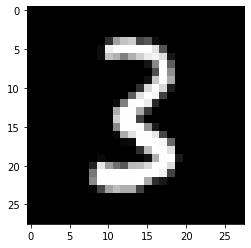

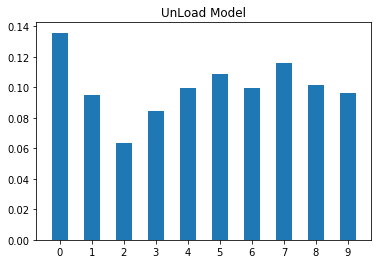

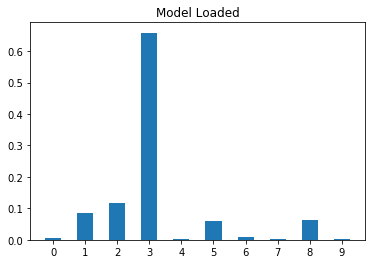

In [43]:
model_load()